<a href="https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/TensorFlow%20In%20Practice/Course%203%20-%20NLP/Course%203%20-%20Week%202%20-%20Lesson%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
import pandas as pd
dataset = pd.read_csv('dataF.csv')
sentences = dataset.iloc[:, 1].values
labels = dataset.iloc[:, -1].values
labels

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [3]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000


In [4]:
sentences=sentences.astype(str)
labels=labels.astype('int')

In [5]:
from sklearn.model_selection import train_test_split
training_sentences, testing_sentences, training_labels, testing_labels = train_test_split(sentences, labels, test_size = 0.2, random_state = 1)

In [6]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [7]:
# Need this block to get it to work with TensorFlow 2.x
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

Multiple Layer LSTM

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          640000    
_________________________________________________________________
bidirectional (Bidirectional (None, None, 128)         66048     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 751,489
Trainable params: 751,489
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
NUM_EPOCHS = 20
history = model.fit(training_padded, training_labels, epochs=NUM_EPOCHS, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/20
328/328 - 19s - loss: 0.4769 - accuracy: 0.7671 - val_loss: 0.2714 - val_accuracy: 0.8874
Epoch 2/20
328/328 - 7s - loss: 0.1833 - accuracy: 0.9301 - val_loss: 0.1873 - val_accuracy: 0.9279
Epoch 3/20
328/328 - 7s - loss: 0.0983 - accuracy: 0.9640 - val_loss: 0.1373 - val_accuracy: 0.9534
Epoch 4/20
328/328 - 7s - loss: 0.0709 - accuracy: 0.9741 - val_loss: 0.1583 - val_accuracy: 0.9515
Epoch 5/20
328/328 - 7s - loss: 0.0560 - accuracy: 0.9780 - val_loss: 0.1417 - val_accuracy: 0.9546
Epoch 6/20
328/328 - 8s - loss: 0.0615 - accuracy: 0.9752 - val_loss: 0.1288 - val_accuracy: 0.9538
Epoch 7/20
328/328 - 8s - loss: 0.0497 - accuracy: 0.9789 - val_loss: 0.1359 - val_accuracy: 0.9550
Epoch 8/20
328/328 - 7s - loss: 0.0387 - accuracy: 0.9824 - val_loss: 0.1371 - val_accuracy: 0.9634
Epoch 9/20
328/328 - 7s - loss: 0.0387 - accuracy: 0.9832 - val_loss: 0.1406 - val_accuracy: 0.9599
Epoch 10/20
328/328 - 7s - loss: 0.0340 - accuracy: 0.9844 - val_loss: 0.1916 - val_accuracy: 0.949

In [21]:
NUM_EPOCHS = 10
history = model.fit(training_padded, training_labels, epochs=NUM_EPOCHS, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/10
328/328 - 8s - loss: 0.0201 - accuracy: 0.9889 - val_loss: 0.1731 - val_accuracy: 0.9664
Epoch 2/10
328/328 - 7s - loss: 0.0276 - accuracy: 0.9871 - val_loss: 0.1310 - val_accuracy: 0.9672
Epoch 3/10
328/328 - 7s - loss: 0.0198 - accuracy: 0.9890 - val_loss: 0.1725 - val_accuracy: 0.9634
Epoch 4/10
328/328 - 7s - loss: 0.0190 - accuracy: 0.9892 - val_loss: 0.1750 - val_accuracy: 0.9634
Epoch 5/10
328/328 - 7s - loss: 0.0191 - accuracy: 0.9896 - val_loss: 0.1798 - val_accuracy: 0.9653
Epoch 6/10
328/328 - 7s - loss: 0.0188 - accuracy: 0.9896 - val_loss: 0.1860 - val_accuracy: 0.9660
Epoch 7/10
328/328 - 7s - loss: 0.0192 - accuracy: 0.9896 - val_loss: 0.1811 - val_accuracy: 0.9641
Epoch 8/10
328/328 - 8s - loss: 0.0209 - accuracy: 0.9893 - val_loss: 0.1561 - val_accuracy: 0.9634
Epoch 9/10
328/328 - 8s - loss: 0.0237 - accuracy: 0.9873 - val_loss: 0.1592 - val_accuracy: 0.9595
Epoch 10/10
328/328 - 8s - loss: 0.0231 - accuracy: 0.9882 - val_loss: 0.1497 - val_accuracy: 0.9676

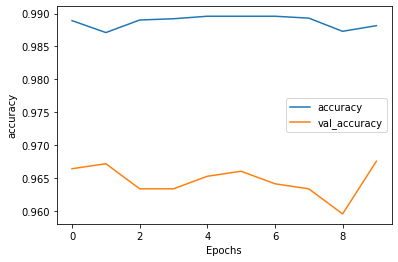

In [22]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
plot_graphs(history, 'accuracy')

convolutional NN

In [10]:
modelc = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 64),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [12]:
modelc.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          640000    
_________________________________________________________________
conv1d (Conv1D)              (None, None, 128)         41088     
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 689,409
Trainable params: 689,409
Non-trainable params: 0
_________________________________________________________________


In [35]:
modelc.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [36]:
NUM_EPOCHS = 15
history = modelc.fit(training_padded, training_labels, epochs=NUM_EPOCHS, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/15
328/328 - 3s - loss: 0.5249 - accuracy: 0.7177 - val_loss: 0.2885 - val_accuracy: 0.8828
Epoch 2/15
328/328 - 3s - loss: 0.2379 - accuracy: 0.9018 - val_loss: 0.2210 - val_accuracy: 0.9229
Epoch 3/15
328/328 - 3s - loss: 0.1407 - accuracy: 0.9466 - val_loss: 0.1937 - val_accuracy: 0.9298
Epoch 4/15
328/328 - 3s - loss: 0.1013 - accuracy: 0.9628 - val_loss: 0.1915 - val_accuracy: 0.9366
Epoch 5/15
328/328 - 3s - loss: 0.0840 - accuracy: 0.9695 - val_loss: 0.1769 - val_accuracy: 0.9416
Epoch 6/15
328/328 - 3s - loss: 0.0717 - accuracy: 0.9744 - val_loss: 0.1886 - val_accuracy: 0.9424
Epoch 7/15
328/328 - 3s - loss: 0.0632 - accuracy: 0.9763 - val_loss: 0.1691 - val_accuracy: 0.9447
Epoch 8/15
328/328 - 3s - loss: 0.0556 - accuracy: 0.9802 - val_loss: 0.1885 - val_accuracy: 0.9473
Epoch 9/15
328/328 - 3s - loss: 0.0519 - accuracy: 0.9804 - val_loss: 0.1854 - val_accuracy: 0.9473
Epoch 10/15
328/328 - 3s - loss: 0.0480 - accuracy: 0.9810 - val_loss: 0.1954 - val_accuracy: 0.9473

sequential

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 16)           160000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 24)                408       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [15]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
328/328 - 1s - loss: 0.6851 - accuracy: 0.5982 - val_loss: 0.6442 - val_accuracy: 0.7771
Epoch 2/30
328/328 - 1s - loss: 0.5673 - accuracy: 0.7530 - val_loss: 0.4376 - val_accuracy: 0.8294
Epoch 3/30
328/328 - 1s - loss: 0.4174 - accuracy: 0.8242 - val_loss: 0.3475 - val_accuracy: 0.8618
Epoch 4/30
328/328 - 1s - loss: 0.3226 - accuracy: 0.8727 - val_loss: 0.2815 - val_accuracy: 0.8901
Epoch 5/30
328/328 - 1s - loss: 0.2559 - accuracy: 0.9042 - val_loss: 0.2522 - val_accuracy: 0.9080
Epoch 6/30
328/328 - 1s - loss: 0.2105 - accuracy: 0.9250 - val_loss: 0.2325 - val_accuracy: 0.9229
Epoch 7/30
328/328 - 1s - loss: 0.1802 - accuracy: 0.9357 - val_loss: 0.2214 - val_accuracy: 0.9202
Epoch 8/30
328/328 - 1s - loss: 0.1564 - accuracy: 0.9429 - val_loss: 0.2066 - val_accuracy: 0.9336
Epoch 9/30
328/328 - 1s - loss: 0.1386 - accuracy: 0.9513 - val_loss: 0.2308 - val_accuracy: 0.9084
Epoch 10/30
328/328 - 1s - loss: 0.1259 - accuracy: 0.9550 - val_loss: 0.1948 - val_accuracy: 0.9359

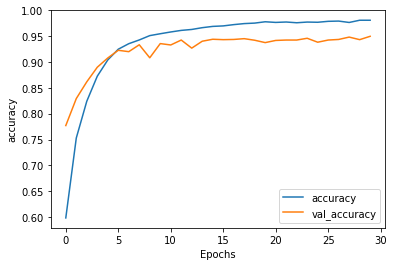

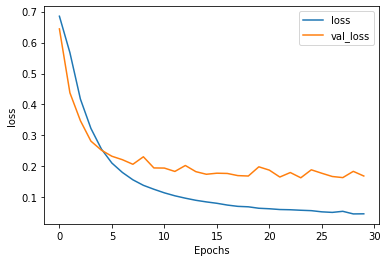

In [16]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(training_padded[0]))
print(training_sentences[2])
print(labels[2])

remov section 230 stand presid trump call representative🇺🇲🇺🇲🇺🇲🇺🇲🇺🇲bigtechelectioninterferencebigtechstandwithpresidenttrump 🇺🇲🇺🇲🇺🇲🇺🇲🇺🇲 ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
ban frack fact— kamala harri octob 8 2020aug 31 2020 – “i ban frack let say ban frack matter mani time donald trump lie me” –
1


In [ ]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)


In [ ]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [ ]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

In [ ]:
sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))